# churn predection

### import packages

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### import data sets

In [63]:
train = pd.read_csv('TRAIN.csv')
test  = pd.read_csv('TEST.csv')

### taking backup of data

In [64]:
train_orginal = train.copy()
test_orginal  = test.copy()

In [65]:
train.shape

(1401, 16)

In [66]:
train.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

In [67]:
train.dtypes

Customer ID                                     object
network_age                                    float64
Customer tenure in month                       float64
Total Spend in Months 1 and 2 of 2017          float64
Total SMS Spend                                float64
Total Data Spend                               float64
Total Data Consumption                         float64
Total Unique Calls                             float64
Total Onnet spend                              float64
Total Offnet spend                             float64
Total Call centre complaint calls              float64
Network type subscription in Month 1            object
Network type subscription in Month 2            object
Most Loved Competitor network in in Month 1     object
Most Loved Competitor network in in Month 2     object
Churn Status                                   float64
dtype: object

In [68]:
train.shape


(1401, 16)

In [69]:
test.shape

(600, 15)

In [70]:
test.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2'],
      dtype='object')

In [71]:
test.dtypes

Customer ID                                     object
network_age                                      int64
Customer tenure in month                       float64
Total Spend in Months 1 and 2 of 2017          float64
Total SMS Spend                                float64
Total Data Spend                               float64
Total Data Consumption                         float64
Total Unique Calls                               int64
Total Onnet spend                                int64
Total Offnet spend                               int64
Total Call centre complaint calls                int64
Network type subscription in Month 1            object
Network type subscription in Month 2            object
Most Loved Competitor network in in Month 1     object
Most Loved Competitor network in in Month 2     object
dtype: object

In [72]:
train.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


#### finding catogarial variables

In [73]:
train["Network type subscription in Month 1"].value_counts()

3G       636
2G       304
Other    285
Name: Network type subscription in Month 1, dtype: int64

In [74]:
train["Network type subscription in Month 2"].value_counts()

3G       687
Other    285
2G       284
Name: Network type subscription in Month 2, dtype: int64

In [75]:
train["Most Loved Competitor network in in Month 1"].value_counts()

PQza        340
Uxaa        324
Mango       204
ToCall      202
Zintel      152
Weematel    139
0            38
Name: Most Loved Competitor network in in Month 1, dtype: int64

In [76]:
train["Most Loved Competitor network in in Month 2"].value_counts()

Uxaa        829
PQza        308
Mango       101
ToCall       64
Weematel     51
Zintel       46
Name: Most Loved Competitor network in in Month 2, dtype: int64

In [77]:
train["Churn Status"].value_counts()

1.0    700
0.0    700
Name: Churn Status, dtype: int64

### type of network preffered and churn rate

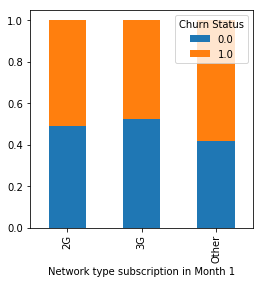

In [78]:
Tech=pd.crosstab(train['Network type subscription in Month 1'],train['Churn Status'])
Tech.div(Tech.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

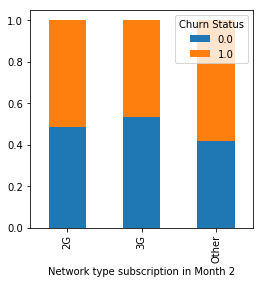

In [79]:
Tech=pd.crosstab(train['Network type subscription in Month 2'],train['Churn Status'])
Tech.div(Tech.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

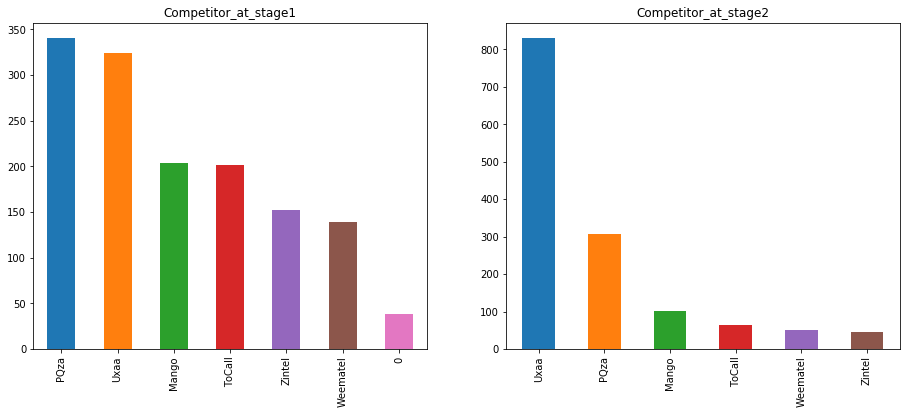

In [80]:
plt.figure(1)
plt.subplot(131)
train['Most Loved Competitor network in in Month 1'].value_counts().plot.bar(figsize=(24,6), title= 'Competitor_at_stage1')

plt.subplot(132)
train['Most Loved Competitor network in in Month 2'].value_counts().plot.bar(title= 'Competitor_at_stage2')

plt.show()

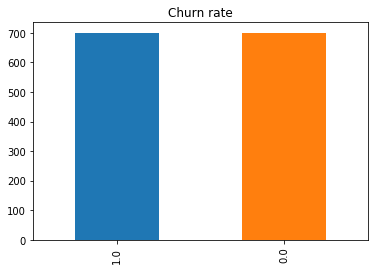

In [81]:
train["Churn Status"].value_counts().plot.bar(title= 'Churn rate')

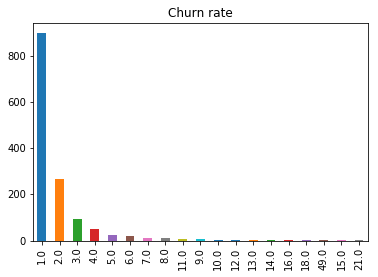

In [82]:
train["Total Call centre complaint calls"].value_counts().plot.bar(title= 'Churn rate')


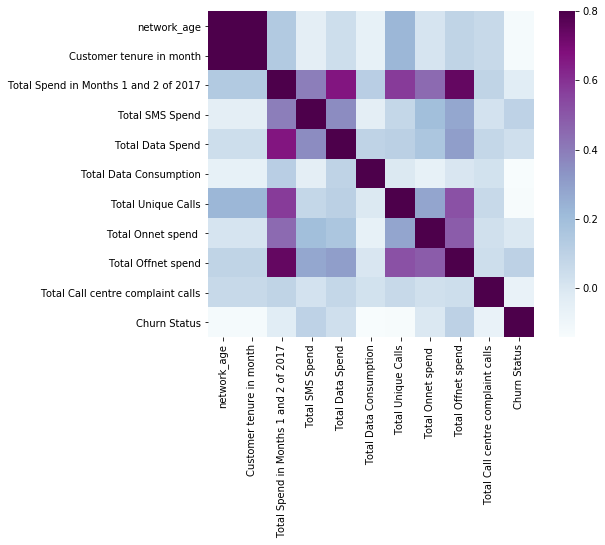

In [83]:
# Print correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

##### co-related varibles are removed for better predection

In [84]:
train=train.drop('Customer tenure in month',axis=1)

In [85]:
train.head()

,Customer ID,network_age,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [86]:
train=train.drop('Total Spend in Months 1 and 2 of 2017',axis=1)

In [87]:
train.head()

,Customer ID,network_age,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [88]:
train.shape

(1401, 14)

##### droping nan rows 

In [89]:
train=train.dropna(how='all')

In [90]:
train.isnull().sum()

Customer ID                                      0
network_age                                      0
Total SMS Spend                                  0
Total Data Spend                                 0
Total Data Consumption                           0
Total Unique Calls                               0
Total Onnet spend                                0
Total Offnet spend                               0
Total Call centre complaint calls                0
Network type subscription in Month 1           175
Network type subscription in Month 2           144
Most Loved Competitor network in in Month 1      1
Most Loved Competitor network in in Month 2      1
Churn Status                                     0
dtype: int64

##### filling missed values

In [91]:
train['Network type subscription in Month 1'].fillna(train['Network type subscription in Month 1'].mode()[0], inplace=True)
train['Network type subscription in Month 2'].fillna(train['Network type subscription in Month 2'].mode()[0], inplace=True)
train['Most Loved Competitor network in in Month 1'].fillna(train['Most Loved Competitor network in in Month 1'].mode()[0], inplace=True)
train['Most Loved Competitor network in in Month 2'].fillna(train['Most Loved Competitor network in in Month 2'].mode()[0], inplace=True)


In [92]:
train.isnull().sum()

Customer ID                                    0
network_age                                    0
Total SMS Spend                                0
Total Data Spend                               0
Total Data Consumption                         0
Total Unique Calls                             0
Total Onnet spend                              0
Total Offnet spend                             0
Total Call centre complaint calls              0
Network type subscription in Month 1           0
Network type subscription in Month 2           0
Most Loved Competitor network in in Month 1    0
Most Loved Competitor network in in Month 2    0
Churn Status                                   0
dtype: int64

In [93]:
train=train.drop('Customer ID',axis=1)


In [94]:
train.shape

(1400, 13)

In [95]:
test.isnull().sum()

Customer ID                                     0
network_age                                     0
Customer tenure in month                        0
Total Spend in Months 1 and 2 of 2017           0
Total SMS Spend                                 0
Total Data Spend                                0
Total Data Consumption                          0
Total Unique Calls                              0
Total Onnet spend                               0
Total Offnet spend                              0
Total Call centre complaint calls               0
Network type subscription in Month 1           70
Network type subscription in Month 2           62
Most Loved Competitor network in in Month 1     0
Most Loved Competitor network in in Month 2     0
dtype: int64

In [96]:
test['Network type subscription in Month 1'].fillna(test['Network type subscription in Month 1'].mode()[0], inplace=True)
test['Network type subscription in Month 2'].fillna(test['Network type subscription in Month 2'].mode()[0], inplace=True)

#### spliting data features and target variable

In [97]:
X = train.drop('Churn Status',1)
y = train["Churn Status"]

#### Adding dummies to the dataset

In [98]:

X=pd.get_dummies(X)

#### selecting of model and training

In [99]:
# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
y_pred = classifier.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [101]:
cm

array([[621,  79],
       [492, 208]], dtype=int64)

In [102]:
y_pred

array([1., 0., 0., ..., 1., 0., 1.])

In [104]:
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

accuracy_score 0.5921428571428572


In [105]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
classifier.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [106]:
y_pred = classifier.predict(X)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [108]:
cm

array([[700,   0],
       [  0, 700]], dtype=int64)

In [109]:
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

accuracy_score 1.0


### after applying logistic regression and DecisionTree error rate and accurcy rate are very low so applyed RandomForest is some what better

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred = classifier.predict(X)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [50]:
cm

array([[696,   4],
       [ 20, 680]], dtype=int64)

In [51]:
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

accuracy_score 0.9828571428571429


In [52]:
submission = test['Customer ID']

In [53]:
test = test.drop('Customer ID',1)

In [54]:
# Adding dummies to the dataset
test_pred=pd.get_dummies(test)

In [55]:
test_pred=test_pred.drop('Total Spend in Months 1 and 2 of 2017',axis=1)
test_pred=test_pred.drop('Customer tenure in month',axis=1)

In [56]:
chur_pred = classifier.predict(test_pred)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [58]:
cm

array([[696,   4],
       [ 20, 680]], dtype=int64)

In [59]:
submission_result=pd.read_csv("sample submission.csv")

submission_result['Customer ID']=submission
submission_result['Churn Status']=chur_pred


In [60]:

submission_result['Churn Status'] = submission_result['Churn Status'].astype(int)


In [61]:
submission_result.to_csv("sample submission.csv",index=False)